In [12]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn
import torchvision.transforms as T
from torchvision.io import read_image

In [23]:
def show(imgs: List[torch.Tensor]):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(20,10))
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))                 # -> cpu -> PILImage
        axs[0, i].imshow(np.asarray(img))                   # -> np.asarray
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

<class 'torch.Tensor'> torch.uint8 torch.Size([3, 2139, 3500])


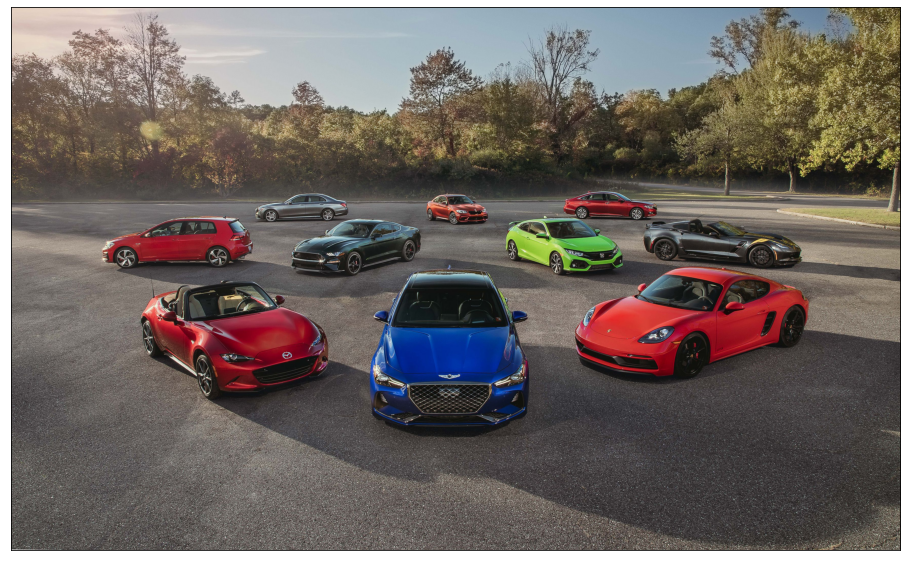

In [29]:
car = read_image('car.jpg')
print(type(car), car.dtype, car.shape)
show([car])

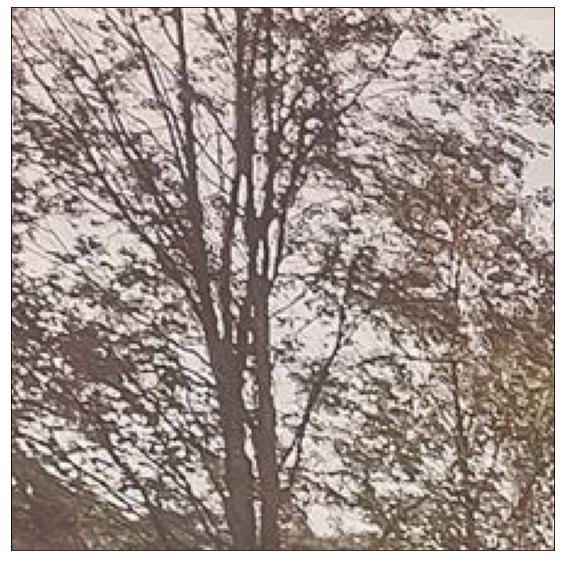

In [25]:
car1 = T.RandomCrop(224)(car)
show([car1])

In [8]:
car2 = T.ConvertImageDtype(torch.float)(car)
print(car2.dtype, car2.shape)

torch.float32 torch.Size([3, 2139, 3500])


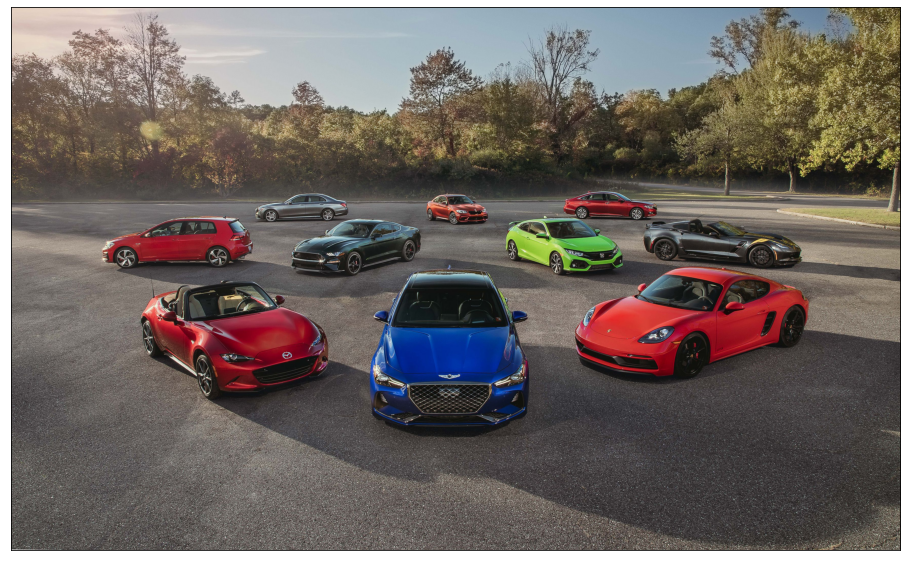

In [30]:
show([car2]) #float를 0~1로 그린다. 문서에는 (row, col, 3)으로 되어 있는데, [3, height, width]인데도 잘 그린다.

In [31]:
nomalized_car = T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(car2)
nomalized_car

tensor([[[ 1.7523,  1.7523,  1.7523,  ..., -0.0972, -0.5767, -0.6452],
         [ 1.7523,  1.7523,  1.7523,  ..., -0.3198, -0.6794, -1.3302],
         [ 1.7694,  1.7694,  1.7694,  ..., -1.2617, -0.9534, -0.4911],
         ...,
         [ 0.2796, -0.1828, -0.7137,  ..., -1.2445, -0.5253,  0.0056],
         [ 2.1462,  2.0434,  1.9749,  ..., -0.5596, -0.5596,  0.8276],
         [ 1.9578,  1.9749,  2.0605,  ...,  1.0331, -0.2513, -0.5596]],

        [[ 1.5882,  1.5882,  1.5882,  ..., -0.1450, -0.6352, -0.6877],
         [ 1.5882,  1.5882,  1.5882,  ..., -0.3725, -0.7402, -1.3880],
         [ 1.6057,  1.6057,  1.6057,  ..., -1.3354, -1.0203, -0.5301],
         ...,
         [ 0.4153, -0.0574, -0.6001,  ..., -1.0378, -0.2675,  0.3277],
         [ 2.3235,  2.2185,  2.1485,  ..., -0.3375, -0.3025,  1.1681],
         [ 2.1310,  2.1485,  2.2360,  ...,  1.2906,  0.0126, -0.2500]],

        [[ 1.5594,  1.5594,  1.5594,  ..., -0.5495, -1.0376, -1.1421],
         [ 1.5594,  1.5594,  1.5594,  ..., -0

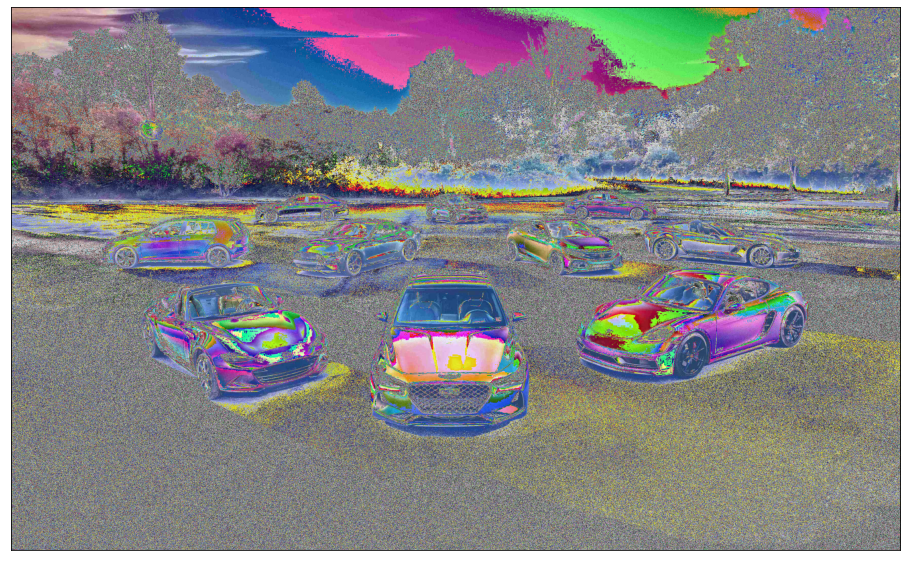

In [32]:
show([nomalized_car])

torch.Size([3, 256, 418])
torch.Size([3, 224, 224])


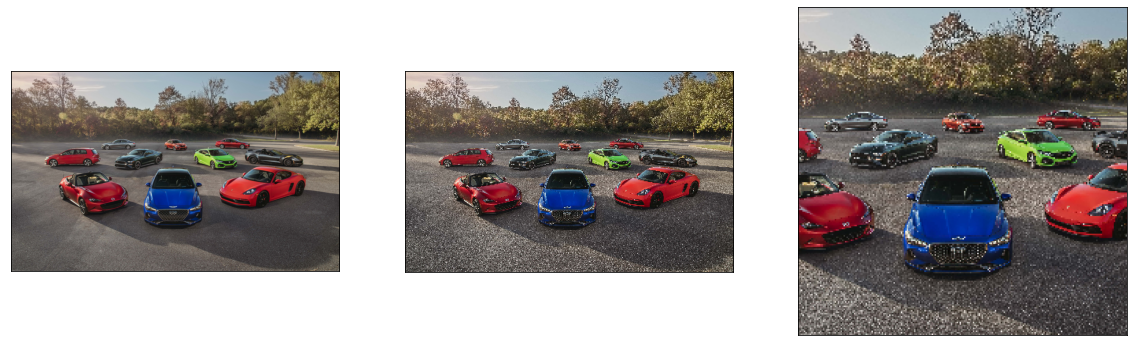

In [33]:
resized_car = T.Resize([256,])(car) # (h, w)
print(resized_car.shape) # height가 256으로 맞쳐진다.
croped_car = T.CenterCrop(224)(resized_car)
print(croped_car.shape)  # 
show([car, resized_car, croped_car])